In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.size']=16
from scipy.optimize import curve_fit
from Richardson_extrapolation import *

4*pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Ly_s**2 + pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Lx_s**2
4*pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Ly_s**2 + pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Lx_s**2
4*pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Ly_s**2 + pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Lx_s**2
4*pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Ly_s**2 + pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Lx_s**2
[2.00699193 0.45897055]
[0.02839878462925949, 0.00701793147931536, 0.0017494241412110997, 0.00043704066426296536]


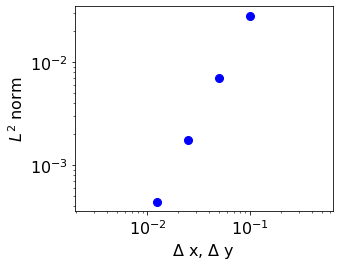

In [3]:
nx_list = [11,21,41,81]
L2_list = []
dx_list = []
u_list = []
ua_list = []

for nx in nx_list:
    
    ny = nx

    Lx,Ly = 1,1
    dx_list.append(Lx/(nx-1))
    
    Q_in_flat,u_a = source_term(nx,ny,Lx,Ly)
    ua_list.append(u_a)
    As = create_matrix(nx,ny,Lx,Ly)
    u = solve_pde(nx,ny,As,Q_in_flat)
    u_list.append(u)
    L2_list.append(L2_norm(u,u_a))
        
fig,ax = plt.subplots(1,1,figsize=[5,4])
ax.loglog(dx_list,L2_list,'.',markersize=16,color='b')

popt,pcov = curve_fit(fit_lin,np.log10(dx_list),np.log10(L2_list),p0=[1,0])
print(popt)
#fit_x = np.logspace(-3,0,101)
#ax.loglog(fit_x,fit_quad(fit_x,*popt),linewidth=2,color='r')

ax.axis('equal')
ax.set_ylabel('$L^2$ norm')
ax.set_xlabel('$\Delta$ x, $\Delta$ y')
fig.tight_layout()

print(L2_list)
fig.savefig('convergence.png',facecolor='white',dpi=150)

In [5]:
u_R_norm = []
u_R_list = []
for i in range(3):
    a = u_list[i][::1,::1]
    b = u_list[i+1][::2,::2]
    u_R = 4/3*b-a/3
    u_R_list.append(u_R)
    u_R_norm.append(L2_norm(u_R,ua_list[i]))
    

[4.00914187 1.2529675 ]


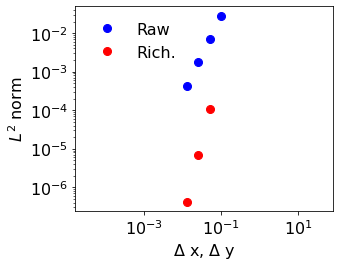

In [6]:
fig,ax = plt.subplots(1,1,figsize=[5,4])
ax.loglog(dx_list,L2_list,'.',markersize=16,color='b',label ='Raw')
ax.loglog(dx_list[1:],u_R_norm,'.',markersize=16, color='r',label = 'Rich.')

popt,pcov = curve_fit(fit_lin,np.log10(dx_list[1:]),np.log10(u_R_norm),p0=[1,0])
print(popt)

ax.axis('equal')
ax.set_ylabel('$L^2$ norm')
ax.set_xlabel('$\Delta$ x, $\Delta$ y')
fig.tight_layout()
fig.legend(frameon=False,loc=[0.25,0.75])
fig.savefig('extra.png',facecolor='white',dpi=150)

/var/folders/v5/742b2zhd1lx3j2bk15yrd_q80000gn/T/ipykernel_42491/1635881510.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolor(x_vals,y_vals,u_list[0])
/var/folders/v5/742b2zhd1lx3j2bk15yrd_q80000gn/T/ipykernel_42491/1635881510.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolor(x_vals,y_vals,ua_list[0])


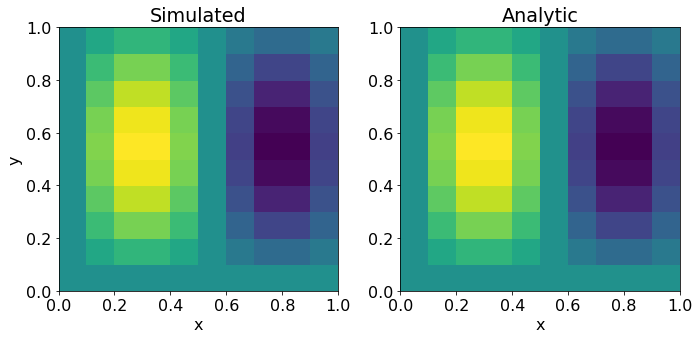

In [7]:
x_vals = np.linspace(0,1,11)
y_vals = np.linspace(0,1,11)
fig,ax = plt.subplots(1,2,figsize=[10,5])
ax[0].pcolor(x_vals,y_vals,u_list[0])
ax[1].pcolor(x_vals,y_vals,ua_list[0])
ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_title('Simulated')
ax[1].set_title('Analytic')
fig.tight_layout()
fig.savefig('sim_ana.png',facecolor='white',dpi=150)

# Richardson extrapolation
I wanted to run through an example of how to increase simulation accuracy using the well-known technique of Richardson extrapolation. The main idea is that the difference between the exact solution $u_a$ to a PDE and an approximate numerical solution $u(h)$ can be written as a power series in h, the step size. 

\begin{equation}
u_{a} = u(h) + \alpha h + \beta h^2 + ...
\end{equation}

If, for example, it is known that the leading error term goes like $h^2$ then $\alpha = 0$. By taking two numerical solutions with different values of h, it is possible to write a pair of linear equations with two unknowns: $u_a$ and $\beta$. Eliminating $\beta$, we get $u_a$ - an improved approximation to the PDE. 

In this example I use a central difference approximation to the Poisson equation, with leading error term that goes like $h^2$.

\begin{equation}
\nabla^2 u(x,y) = -\rho (x,y)
\end{equation}

Using the method of manufactured solutions, I choose a solution $u_a$ and by differentation determine what the source term $\rho(x,y)$ must have been. This source term is then used for the numerical solution. The simulation domain is taken as being a rectangle defined by the pair of points $(0,0)$ and $(L_x,L_y)$ 

\begin{equation}
u_a = \sin(\frac{\pi x}{L_x})\sin(\frac{2 \pi y}{L_y})
\end{equation}

The finite difference equation is as follows:

\begin{equation}
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{\Delta x^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{\Delta y^2} = -\rho_{i,j}
\end{equation}

It is written as a sparse matrix equation and solved exactly using SciPy's spsolve method. In this way we find the numerical solution which can be compared to the analytic solution.

<img src="sim_ana.png" width="800" height="400">

Of course it is not enough to perform a visual comparison so the $L^2$ norm is used to compare the two. 

\begin{equation}
L^2 = \sqrt{\frac{\Sigma (u-u_a)^2}{\Sigma u_a^2}}
\end{equation}

By plotting the $L^2$ norm as a function of $\Delta x = \Delta y$ we can see the second order convergence, as expected, from this numerical approximation to the Poisson equation. 

<img src="convergence.png" width="400" height="400">

Finally, we are in a position to consider Richardson extrapolation. For a numerical approximation u(2h) and u(h) the extrapolated solution can we written as follows. Note that the discretisation parameter is chosen so that there are overlapping points between u(2h) and u(h). 

\begin{equation}
u_R = 4/3 u(h) - 1/3 u (2h)
\end{equation}

So from a pair of numerical solutions we deduce a single extrapolated solution, u_R. These are plotted vs $h$ as the orange points in the following graph, the blue points being the raw solutions. A remarkable decrease in $L^2$ norm is seen, but not only is there a decreased $L^2$, there is also a gain of a order in accuracy. 

<img src="extra.png" width="400" height="400">

The benefit of Richardson's extrapolation is clear, it provides a clear advantage in accuracy in the case that there is a well known rate of convergence. 

## References


In [10]:
Lx,Ly = 1,1
ny, nx = 201,201

Lx,Ly = 1,1
dx = Lx/(nx-1)
    
Q_in_flat,u_a = source_term(nx,ny,Lx,Ly)

As = create_matrix(nx,ny,Lx,Ly)
%timeit u = solve_pde(nx,ny,As,Q_in_flat)


4*pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Ly_s**2 + pi_s**2*sin(pi_s*x_s/Lx_s)*sin(2*pi_s*y_s/Ly_s)/Lx_s**2
218 ms ± 7.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
